# Автоматическая обработка текстов

## Екатерина Черняк

###  ФКН НИУ ВШЭ

### echernyak@hse.ru

# Введение

## Краткая история 

1. 7 января 1954. Джорджтаунский эксперимент по машинному переводу с русского на английский; 
1. 1957 г.,  Ноам Хомский ввел "универсальную грамматику";
1. 1961 г., Начинается сбор Брауновского корпуса;
1. конец 1960-х гг., ELIZA –- программа, ведущая психотерапевтические разговоры;
1. 1975 г.,  Солтон ввел векторную модель (Vector Space Model, VSM);
1. до 1980–х. Методы решения задач, основанные на правилах;
1. после 1980–х гг., Методы решения задач, основанные на машинном обучении и корпусной лингвистике;
1. 1998  г., Понте и Крофт вводят языковую модель (Language Model, LM);
1. конец 1990–х  гг., Вероятностные тематические модели (LSI, pLSI, LDA, и т.д.);
1. 1999   г., Опубликован учебник Маннинга и Щютце "Основы статистической автоматической обработки текстов" ("Foundations of Statistical Natural Language Processing");
1. 2009  г.. Опубликован учебник Берда, Кляйна и Лопера "Автоматическая обработка текстов на Python" ("Natural Language Processing with Python); 
1. Mikolov, Tomas и др. "Efficient estimation of word representations in vector space".

## Основные задачи
* Машинный перевод
* Классификация текстов
    * Фильтрация спама
    * По тональности
    * По теме или жанру
* Кластеризация текстов
* Извлечение информации
    * Фактов и событий
    * Именованных сущностей
* Вопросно-ответные системы
* Суммаризация текстов
* Генерация текстов
* Распознавание речи
* Проверка правописания
* Оптическое распознавание символов
* Пользовательские эксперименты и оценка точности и качества методов

## Основные техники 
* Уровень символов:
    * Токенизация: разбиение текста на слова
    * Разбиение текста на предложения
* Уровень слов – морфология:
    * Разметка частей речи
    * Снятие морфологической неоднозначности
* Уровень предложений – синтаксис:
    * Выделенние именных или глагольных групп (chunking)
    * Выделенние семантических ролей
    * Деревья составляющих и зависимостей
* Уровень смысла – семантика и дискурс:
    * Разрешение кореферентных связей
    * Анализ дискурсивных связей
    * Выделение синонимов
    * Анализ аргументативных связей

## Основные проблемы
* Неоднозначность
    * Лексическая неоднозначность: *орган, парить, рожки, атлас*
    * Морфологическая неоднозначность: *Хранение денег в банке. Что делают белки в клетке?*
    * Синтаксическая неоднозначность: *Мужу изменять нельзя. Его удивил простой солдат.*
* Неологизмы: *печеньки, заинстаграммить, репостнуть, расшарить, затащить, килорубли*
* Разные варианты написания: *Россия, Российская Федерация, РФ*
* Нестандартное написание: *каг дила?*

### Синтаксическая неоднозначность 
![синтаксическая неоднозначность](http://78.media.tumblr.com/d6552ff51881937371c94dc18865d711/tumblr_mo1nl6Nt9n1rwewyjo1_400.jpg)


* I saw the man. The man was on the hill. I was using a telescope.
* I saw the man. I was on the hill. I was using a telescope.
* I saw the man. The man was on the hill. The hill had a telescope.
* I saw the man. I was on the hill. The hill had a telescope.
* I saw the man. The man was on the hill. I saw him using a telescope.

# План

1. Морфология. Синтаксис. Извлечение ключевых слов и словосочетаний.
2. Векторная модель документа и информационный поиск. Векторная модель слова и дистрибутивная семантика. Методы снижения размерности. Тематическое моделирование, word2vec, GloVe
3. Классификация документов и классификация последовательностей. Сверточные нейронные сети, условные случайные поля. 
4. Языковая модель. Нейронная языковая модель. Реккурентные нейронные сети. Извлечение именованных сущностей. 

# Токенизация и подсчет количества слов


## Сколько слов в этом предложении?
* На дворе трава, на траве дрова, не руби дрова на траве двора.*

** 12 токенов** : На, дворе, трава, на, траве, дрова, не, руби, дрова, на, траве, двора

** 8 - 9 типов** : Н/на, дворе, трава, траве, дрова, не, руби, двора. 

** 6  лексем** : на, не, двор, трава, дрова, рубить


### Токен и тип

**  Тип **  – уникальное слово из текста

** Токен **  – тип и его позиция в тексте




### Обозначения 
$N$ = число токенов

$V$ – словарь (все типы)

$|V|$ = количество типов в словаре

** Как связаны $N$ и $|V|$?**


### Закон Ципфа


В любом достаточно большом тексте ранг типа обратно пропорционален его частоте: $f = \frac{a}{r}$

$f$ – частота типа, $r$  – ранг типа, $a$  – параметр, для славянских языков – около 0.07


### Закон Хипса

С увеличением длины текста (количества токенов), количество типов увеличивается в соответствии с законом: $|V| = K*N^b$


$N$  –  число токенов, $|V|$  – количество типов в словаре, $K, b$  –  параметры, обычно $K \in [10,100], b \in [0.4, 0.6]$

# Анализ новостных сообщений

Рассмотрим коллекцию новостных сообщений за первую половину 2017 года. Про каждое новостное сообщение известны:
* его заголовок и текст
* дата его публикации
* событие, о котором это новостное сообщение написано 
* его рубрика 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('../data/news.csv')
df.head()

,text,date,event,class
0,В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
1,"Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
2,"Аргументы и Факты (aif.ru), Москва, 14 января...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
3,"Google Новости ТОП, Москва, 14 января 2017 АК...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
4,"Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ


## Предварительный анализ коллекции

### Средняя длина текстов

In [3]:
len_data = df.text.apply(len)
len_data.describe()

count      1930.000000
mean       3798.322798
std        7865.936695
min          31.000000
25%        1215.250000
50%        1918.000000
75%        4044.000000
max      185698.000000
Name: text, dtype: float64

### Количество текстов о разных событиях

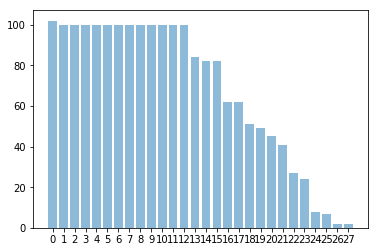

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
counts = df.event.value_counts()
values = counts.tolist()
labels = counts.index.tolist()


y_pos = np.arange(len(labels))

 
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, range(len(labels)))

 
plt.show()

### Длины текстов (в символах)

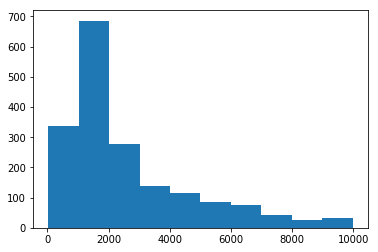

In [5]:
fig, ax = plt.subplots()

length = len_data[len_data < 10000].tolist()

n, bins, patches = ax.hist(length)

fig.show()

## Токенизация

Используем регулярные выражения, чтобы разбить тексты на слова

In [7]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

df.text.iloc[0]

'в петербурге прошел митинг против передачи исаакиевского собора рпц в санкт петербурге люди устроили акцию протеста против передачи исаакиевского собора в безвозмездное пользование рпц жители петербурга собрались на исаакиевской площади чтобы высказаться против передачи исаакиевского собора в безвозмездное пользование рпц передает тасс акция проходит в формате встречи с депутатами законодательного собрания города и не требует согласования с властями участники акции не используют какую либо символику и плакаты а также мегафоны или средства звукоусиления по словам депутата алексея ковалева на исаакиевскую площадь пришло примерно тысяча человек перед участниками протеста выступили депутаты местного парламента борис вишневский и максим резник которые заявили о том что потребуют отмены решения смольного вишневский сообщил что акция будет проходить в виде встречи депутатов с избирателями закон санкт петербурга предоставляет нам право встречаться с избирателями такую встречу мы и проведем ра

### Самые частые слова

In [8]:
from nltk import FreqDist
n_types = []
n_tokens = []
tokens = []
fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['text'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))
for i in fd.most_common(10):
    print(i)

('в', 43571)
('и', 25182)
('на', 19120)
('что', 13617)
('не', 11953)
('с', 10868)
('по', 9080)
('о', 5035)
('это', 4955)
('он', 4761)


### Закон Ципфа

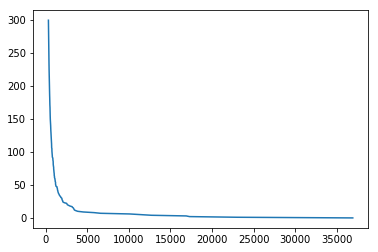

In [66]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### Закон Хипса

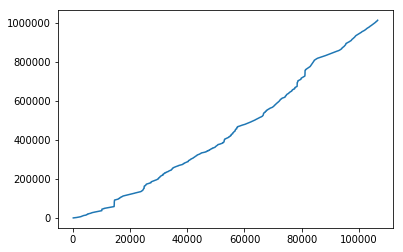

In [67]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()


##  Регулярные выражения подробнее


__*Классы символов:*__

__[A-Z]__ – символы верхнего регистра (латиница)

__[a-z]__ – символы нижнего регистра (латиница)

__[А-Я]__ – символы верхнего регистра (кириллица)

__[а-я]__ – символы нижнего регистра (кириллица)

__[0-9]__ или __\d__ – цифра

__[^0-9]__ или __\D__ – любой символ, кроме цифры

__.__ – любой символ



__*Служебные символы:*__

__\t__ – табуляция

__\s__ – любой пробельный символ

__\S__ – все символы, кроме пробельных

__\n__  – перенос строки

__^__ – начало строки

__$__ – конец строки

__\__ – экранирование

__*Операторы:*__

__?__ - предыдущий символ/группа может быть, а может не быть

__+__ - предыдущий символ/группа может повторяться 1 и более раз

__*__ - предыдущий символ/группа может повторяться 0 и более раз

__{n,m}__ - предыдущий символ/группа может повторяться от от n до m включительно

__{n,}__ - предыдущий символ/группа в скобках может повторяться n и более раз

__{,m}__ - предыдущий символ/группа может повторяться до m раз

__{n}__ - предыдущий символ/группа повторяется n раз

Внутри групп не работают операторы __.__, __+__, __*__, их необходимо экранировать с помощью обратного слеша: \



__*Методы:*__

__re.match(pattern, string)__ - найти подстроку pattern в начале строки string



In [14]:
import re

m = re.match(r'рыбак', 'рыбак рыбака видит издалека')

print(m)
print(m.group(0))
print(m.start(), m.end())

l = re.match(r'видит', 'рыбак рыбака видит издалека')
print(l)

<_sre.SRE_Match object; span=(0, 5), match='рыбак'>
рыбак
0 5
None



__re.search(pattern, string)__ - аналогичен методу match, но ищет не только в начале строки (но возвращает только первое вхождение!)




In [16]:
m = re.search(r'издалека', 'рыбак рыбака видит издалека')

print(m)
print(m.group(0))
print(m.start(), m.end())

l = re.search(r'прорубь', 'рыбак рыбака видит издалека')
print(l)

<_sre.SRE_Match object; span=(19, 27), match='издалека'>
издалека
19 27
None


__re.findall(pattern, string)__ -  возвращает все вхождения pattern в string в виде списка

In [19]:
m = re.findall(r'рыбак', 'рыбак рыбака видит издалека')

print(m)

l = re.findall(r'прорубь', 'рыбак рыбака видит издалека')
print(l)

['рыбак', 'рыбак']
[]


__re.split(pattern, string, [maxsplit=0])__ - разделяет строку string по шаблону pattern; параметр maxsplit отвечает за максимальное количество разбиений (если их существует несколько).




In [20]:
m = re.split(r'видит', 'рыбак рыбака видит издалека')

print(m)

l = re.split(r'рыбак', 'рыбак рыбака видит издалека')
print(l, len(l))

l1 = re.split(r'рыбак', 'рыбак рыбака видит издалека',maxsplit=1)
print(l1, len(l1))

['рыбак рыбака ', ' издалека']
['', ' ', 'а видит издалека'] 3
['', ' рыбака видит издалека'] 2


__re.sub(pattern, string2, string1)__ - заменяет все вхождения pattern в string1 на srting2




In [21]:
m = re.sub(r'рыбак', 'Рыбак', 'рыбак рыбака видит издалека')

print(m)

Рыбак Рыбака видит издалека


__re.compile(pattern)__ - создает объект для последующего поиска

In [22]:
prog = re.compile(r'рыбак')

m = prog.findall('рыбак рыбака видит издалека')

print(m)

['рыбак', 'рыбак']


In [23]:
prog = re.compile('[А-Я]') # поиск всех заглавныех букв в строке

m = prog.findall('Рыбак рыбака видит издалека. Всегда!')

print(m)

['Р', 'В']


In [25]:
prog = re.compile('[авекорсту]{1}[0-9]{3}[авекорсту]{2}') # регулярное выражение для поиска автомобильных
                                                          # номеров (русские буквы, совпадающие с латиницей)

s = 'у456ао, ы234ег, 99авто443'
print(s)
res = prog.findall(s)

print(*res)

у456ао, ы234ег, 99авто443
у456ао


In [26]:
# пример "жадных" операторов: ищем котов

s = 'кот котик компот'
res1 = re.findall(r'к.*т', s)
print(res1)

res2 = re.findall(r'к.*?т', s)
print(res2)

res3 = re.findall(r'к[\S]*?т', s)
print(res3)

res4 = re.findall(r'кот.*\s', s)
print(res4)

['кот котик компот']
['кот', 'кот', 'к компот']
['кот', 'кот', 'компот']
['кот котик ']


### __Задание 1__

Найдите в тексте все номера телефонов; текст лежит в файле 'task1.txt'. Обратите внимание на возможные форматы написания номеров.

In [4]:
import re

with open ('../data/task1.txt', encoding='utf8') as f:
    phones = f.read()
    
print(phones)

#здесь Ваш код

Гарантируется, что в номере 11 цифр и он отделен пробелом, но форматы написания могут отличаться:


89268659970	Анна
8(495)3451212	Алексей Иванин
Автомастерская	+7(234)456-78-90
8(956)234-23-23	соседка 125 квартира
Офис, 5 этаж	85679962312 
Игорь		+7-845-344-23-65



### Сегментация предложений

"?", "!" как правило однозначны. Проблемы возникают с ".".

Бинарный классификатор для сегментации предложений: для каждой точки "." определить, является ли она концом предложения или нет.


In [3]:
from nltk.tokenize import sent_tokenize

text = 'Первое предложение. Второе предложение! И, наконец, третье?'
sents = sent_tokenize(text)

print(len(sents))
print(*sents, sep='\n')

3
Первое предложение.
Второе предложение!
И, наконец, третье?


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/katya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### __Задание 2__

Посчитайте количество предложений, токенов и типов в тексте из файла task2.txt. Сохраните список токенов в массив tokens.

In [1]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))

## __Частотный анализ текста__

In [48]:
import nltk

d1 = nltk.FreqDist(tokens) # частотный словарь для текста
d1.most_common(10) # токен и кол-во его появлений в тексте

[('и', 4),
 ('мы', 4),
 ('один', 2),
 ('в', 2),
 ('орел', 2),
 ('судьба', 1),
 ('был', 1),
 ('только', 1),
 ('выход', 1),
 ('ибо', 1)]

### Задание 3

1. Посчитайте, сколько слов в тексте task2 встречается больше одного раза.
2. Посчитайте количество слов, состоящих из 5 букв и более.

# Морфологический анализ

### Задачи морфологического анализа
* Разбор слова — определение нормальной формы  (леммы), основы (стема) и грамматических характеристик слова
* Синтез слова — генерация слова по заданным грамматическим характеристикам


### Морфологический процессор – инструмент морфологического анализа
* Морфологический словарь 
* Морфологический анализатор

### Лемматизация 
У каждого слова есть *лемма* (нормальная форма): 

* кошке, кошку, кошкам, кошкой $\implies$ кошка
* бежал, бежит, бегу $\implies$  бежать
* белому, белым, белыми $\implies$ белый

In [56]:
sent = 'Действительно, на его лице не отражалось никаких чувств – ни проблеска сочувствия не было на нем, а ведь боль просто невыносима' 

In [9]:
sent = 'У страха глаза велики .'

In [10]:
from pymorphy2 import MorphAnalyzer

m = MorphAnalyzer()
lemmas1 = [m.parse(word)[0].normal_form for word in sent.split()]
print(' '.join(lemmas1))

у страх глаз велик


In [11]:
from pymystem3 import Mystem

m = Mystem()
lemmas2 = m.lemmatize(sent)
print(''.join(lemmas2))

у страх глаз большой



### Стемминг
Слова состоят из морфем: $word = stem + affixes$. Стемминг позволяет отбросить аффиксы. Чаще всего используется алгоритм Портера.

* 1-ый вид ошибки: белый, белка, белье $\implies$  бел

* 2-ой вид ошибки: трудность, трудный $\implies$  трудност, труд 

* 3-ий вид ошибки: быстрый, быстрее $\implies$  быст, побыстрее $\implies$  побыст

Алгоритм Портера состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.


In [59]:
from nltk.stem.snowball import RussianStemmer

stemmer = RussianStemmer()
words = ['распределение', 'приставить', 'сделала', 'словообразование']
for w in words:
    stem = stemmer.stem(w)
    print(stem)

распределен
пристав
сдела
словообразован


### Разбор слова 

In [21]:
word = 'ГАИ'

In [22]:
m = MorphAnalyzer()
m.parse(word)

[Parse(word='гаи', tag=OpencorporaTag('NOUN,anim,masc,Name plur,nomn'), normal_form='гай', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 41, 6),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,masc plur,nomn'), normal_form='гай', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 495, 7),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,masc plur,accs'), normal_form='гай', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 495, 10),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,nomn'), normal_form='гаи', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 645, 0),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,gent'), normal_form='гаи', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 645, 1),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,datv'), normal_form='гаи', scor

In [23]:
m = Mystem()
m.analyze(word)

[{'analysis': [{'gr': 'S,сокр,ед,жен,неод=(пр|вин|дат|род|твор|им)',
    'lex': 'гаи'}],
  'text': 'ГАИ'},
 {'text': '\n'}]

### Задание 4

Найдите в списке персонажей романа "Война и мир"  (task4.txt) все уникальные  женские имена.

## Первичная обработка текстов

### Удаление стоп-слов

In [69]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [71]:
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
 

In [72]:
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [73]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""


In [74]:
df.text = df.text.apply(remove_stopwords) 
df.text = df.text.apply(lemmatize)
df.text = df.text.apply(remove_stoplemmas) 

In [75]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['text'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(10):
    print(i)

('россия', 5643)
('год', 4750)
('москва', 4632)
('человек', 4556)
('путин', 4357)
('президент', 4109)
('выборы', 2849)
('вопрос', 2672)
('российский', 2312)
('время', 2261)


# Синтаксический анализ


## Грамматика зависимостей

Я купил кофе в большом магазине

![дерево зависимостей](https://habrastorage.org/getpro/geektimes/post_images/67a/b10/baf/67ab10baf90e8f9e321c2e29998e5de8.png)

* Все слова в предложении связаны отношением типа "хозяин-слуга", имеющим различные подтипы
* Узел дерева – слово в предложении
* Дуга дерева – отношение подчинения


[Универсальные зависимости](http://universaldependencies.org/)


### SyntaxNet 

[SyntaxNet](https://github.com/tensorflow/models/tree/master/research/syntaxnet) – архитектура синтаксического парсера. Доступны обученные модели для более чем 40 языков, в том числе, для русского.


D. Chen and C. D. Manning. A Fast and Accurate Dependency Parser using Neural Networks. EMNLP. 2014.

In [79]:
!echo "На северо-западе Москвы два подростка провалились под лед" | docker run --rm -i inemo/syntaxnet_rus

I syntaxnet/term_frequency_map.cc:103] Loaded 34 terms from ./syntaxnet/models/Russian-SynTagRus/label-map.
I syntaxnet/embedding_feature_extractor.cc:35] Features: stack.child(1).label stack.child(1).sibling(-1).label stack.child(-1).label stack.child(-1).sibling(1).label stack.child(2).label stack.child(-2).label stack(1).child(1).label stack(1).child(1).sibling(-1).label stack(1).child(-1).label stack(1).child(-1).sibling(1).label stack(1).child(2).label stack(1).child(-2).label; input.token.morphology-set input(1).token.morphology-set input(2).token.morphology-set input(3).token.morphology-set stack.token.morphology-set stack.child(1).token.morphology-set stack.child(1).sibling(-1).token.morphology-set stack.child(-1).token.morphology-set stack.child(-1).sibling(1).token.morphology-set stack.child(2).token.morphology-set stack.child(-2).token.morphology-set stack(1).token.morphology-set stack(1).child(1).token.morphology-set stack(1).child(1).sibling(-1).token.morphology-set stack(

In [78]:
! cat ../data/sentences.txt | docker run --rm -i inemo/syntaxnet_rus > ../data/sentences.conll

I syntaxnet/term_frequency_map.cc:103] Loaded 34 terms from ./syntaxnet/models/Russian-SynTagRus/label-map.
I syntaxnet/embedding_feature_extractor.cc:35] Features: stack.child(1).label stack.child(1).sibling(-1).label stack.child(-1).label stack.child(-1).sibling(1).label stack.child(2).label stack.child(-2).label stack(1).child(1).label stack(1).child(1).sibling(-1).label stack(1).child(-1).label stack(1).child(-1).sibling(1).label stack(1).child(2).label stack(1).child(-2).label; input.token.morphology-set input(1).token.morphology-set input(2).token.morphology-set input(3).token.morphology-set stack.token.morphology-set stack.child(1).token.morphology-set stack.child(1).sibling(-1).token.morphology-set stack.child(-1).token.morphology-set stack.child(-1).sibling(1).token.morphology-set stack.child(2).token.morphology-set stack.child(-2).token.morphology-set stack(1).token.morphology-set stack(1).child(1).token.morphology-set stack(1).child(1).sibling(-1).token.morphology-set stack(

Обработка conll файлов:

In [91]:
from nltk import DependencyGraph
import codecs

processed_sentences = []
sentence = []
for line in codecs.open('data.conll', 'r', 'utf-8'):
    if len(line) == 1:
        processed_sentences.append(sentence)
        sentence = []
    else:
        word = line.split("\t")
        sentence.append(word)

deps = []
for sentence in processed_sentences:
    s = u""
    for line in sentence:
        s += u"\t".join(line) + u'\n'
    deps.append(s)


Синтаксические деревья:

In [93]:
for sent_dep in deps:
    graph = DependencyGraph(tree_str=sent_dep)
    tree = graph.tree()
    print(tree.pretty_print())

               испек                           
   ______________|__________                    
  |       |      |       помощью               
  |       |      |     _____|__________         
  |       |      |    |            интеллекта  
  |       |      |    |                |        
Google печенье   .    с          искусственного

None
             стал             
    __________|_______         
   |     |         звездой    
   |     |     _______|_____   
   |     |    |       |    НХЛ
   |     |    |       |     |  
Овечкин  .  первой   дня    в 

None
    задержали                           
  ______|_______________                 
 |      |         подозреваемого        
 |      |               |                
 |    Кубани         убийстве           
 |      |       ________|___________     
 .      На     в                 двойном

None
    вынес                   
  ____|_______________       
 |    |      |     приговор 
 |    |      |        |      
 |    |   Росто

In [ ]:
Тройки слово-слово-связь:

In [89]:
for sent_dep in deps:
    graph = DependencyGraph(tree_str=sent_dep)
    print([triple for triple in (graph.triples())])
    print()

[(('испек', 'VERB'), 'dobj', ('Google', 'NOUN')), (('испек', 'VERB'), 'nmod', ('помощью', 'NOUN')), (('помощью', 'NOUN'), 'case', ('с', 'ADP')), (('помощью', 'NOUN'), 'nmod', ('интеллекта', 'NOUN')), (('интеллекта', 'NOUN'), 'amod', ('искусственного', 'ADJ')), (('испек', 'VERB'), 'nsubj', ('печенье', 'NOUN')), (('испек', 'VERB'), 'punct', ('.', 'PUNCT'))]

[(('стал', 'VERB'), 'nsubj', ('Овечкин', 'NOUN')), (('стал', 'VERB'), 'nmod', ('звездой', 'NOUN')), (('звездой', 'NOUN'), 'amod', ('первой', 'ADJ')), (('звездой', 'NOUN'), 'nmod', ('дня', 'NOUN')), (('звездой', 'NOUN'), 'nmod', ('НХЛ', 'NOUN')), (('НХЛ', 'NOUN'), 'case', ('в', 'ADP')), (('стал', 'VERB'), 'punct', ('.', 'PUNCT'))]

[(('задержали', 'VERB'), 'nmod', ('Кубани', 'NOUN')), (('Кубани', 'NOUN'), 'case', ('На', 'ADP')), (('задержали', 'VERB'), 'dobj', ('подозреваемого', 'NOUN')), (('подозреваемого', 'NOUN'), 'nmod', ('убийстве', 'NOUN')), (('убийстве', 'NOUN'), 'case', ('в', 'ADP')), (('убийстве', 'NOUN'), 'amod', ('двойном',

Тройки субьект-объект-глагол:

In [83]:
for sent_dep in deps:
    graph = DependencyGraph(tree_str=sent_dep)
    sov = {}
    for triple in graph.triples():
        if triple:
            if triple[0][1] == 'VERB':
                sov[triple[0][0]] = {'subj':'','obj':''}
    for triple in graph.triples():
        if triple:
            if triple[1] == 'nsubj':
                if triple[0][1] == 'VERB':
                    sov[triple[0][0]]['subj']  = triple[2][0]
            if triple[1] == 'dobj':
                if triple[0][1] == 'VERB':
                    sov[triple[0][0]]['obj'] = triple[2][0]

    for verb in sov:
        print(verb,sov[verb])

испек {'subj': 'печенье', 'obj': 'Google'}
стал {'subj': 'Овечкин', 'obj': ''}
задержали {'subj': '', 'obj': 'подозреваемого'}
вынес {'subj': 'суд', 'obj': 'приговор'}
закрасили {'subj': 'Чиновники', 'obj': 'мемориал'}
продлил {'subj': 'Клуб', 'obj': 'контракт'}


## Задание 5
Измените код выше так, чтобы учитывались:
    1. Однородные члены предложения 
        * (парк, площадка), (Германия, Щвейцария)
    2. Сложные сказуемые 
        * (начнет продавать), (запретил провозить)
    3. Непрямые объекты
        * (едет, Польшу), (спел, скандале)

In [6]:
#решение Задания 1
prog1 = re.compile('[\+0-9\-\(\)]{11,}')
res = prog1.findall(phones)
print(*res, sep='\n')

89268659970
8(495)3451212
+7(234)456-78-90
8(956)234-23-23
85679962312
+7-845-344-23-65


In [5]:
#решение Задания 2
import nltk
text = ' '.join([line.strip() for line in open('../data/task2.txt')])
tokens = words_only(text)

sents = sent_tokenize(text)
print(len(sents))

d1 = nltk.FreqDist(tokens)
print(d1)

9
<FreqDist with 36 samples and 359 outcomes>


In [46]:
# решение Задания 3.1
res = [i for i in d1.most_common() if i[1] > 1]
print(*res, sep='\n')
print(len(res))

('и', 4)
('мы', 4)
('один', 2)
('в', 2)
('орел', 2)
5


In [51]:
# решение Задания 3.2
res = [i for i in d1 if len(i) > 5]
print(res)
print(len(res))

['судьба', 'только', 'сплелись', 'слишком', 'запутанный', 'блаженства', 'решить', 'как-нибудь', 'доверимся', 'жребию', 'поженимся', 'расстанемся', 'навсегда', 'монетка', 'подброшена', 'звякнула', 'завертелась', 'остановилась', 'уставились', 'недоумением', 'сказали']
21


In [ ]:
#решение Задания 4
from pymorphy2 import MorphAnalyzer

m = MorphAnalyzer()
prog = re.compile('[А-Я]{1}[а-я]+') #слова с заглавной буквы
tokens = prog.findall(raw)
lemmas = [m.parse(word)[0].normal_form for word in tokens]

names = set()
for w in lemmas:
    p = m.parse(w)[0].tag
    if {'Name', 'femn'} in p:
        names.add(w.capitalize())
        
print(*names, sep='\n')